In [ ]:
# Initialize configuration
from config import TradingConfig
config = TradingConfig(
price_lower=20000,
price_upper=30000,
grid_size=500,
contract_size=0.1,
leverage=5,
initial_capital=10000,
fee_rate=0.0004
)

In [ ]:
# 数据获取      market_config参数需求
# curl "https://api.bitget.com/api/v2/mix/market/history-candles?symbol=BTCUSDT&granularity=1W&limit=200&productType=usdt-futures&startTime=1733403674565"
from market_data import MarketData
market_config = {
        "symbol": "BTCUSDT",
        "productType": "usdt-futures",
        "granularity": "5m",  # 5分钟K线
        "limit": "100",  # 获取100条数据
        "startTime": "1689813373000",
        "endTime": None
    }
market_data = MarketData(market_config)
grid_trading, timestamps = market_data.fetch_real_data()
grid_trading

[]

In [8]:
import requests
def get_btc_prices(api_key, currency="USD", code="BTC", start=1617035100000, end=1617035400000):
    """
    Fetch BTC price history from Livecoinwatch API and return a list of prices.
    
    :param api_key: Your API key for Livecoinwatch
    :param currency: Currency code (default: "USD")
    :param code: Cryptocurrency code (default: "BTC")
    :param start: Start timestamp in milliseconds
    :param end: End timestamp in milliseconds
    :return: List of BTC prices during the given time period
    """
    url = "https://api.livecoinwatch.com/coins/single/history"
    headers = {
        "content-type": "application/json",
        "x-api-key": api_key
    }
    payload = {
        "currency": currency,
        "code": code,
        "start": start,
        "end": end,
        "meta": True
    }
    
    try:
        response = requests.post(url, headers=headers, json=payload)
        response.raise_for_status()  # Raise an error for HTTP errors
        data = response.json()
        history = data.get("history", [])
        prices = [entry["rate"] for entry in history]
        date = [entry["date"] for entry in history]
        return prices, date
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return []

api_key = "b37339f2-daf3-41b7-9d17-e7e1f469f293"
grid_trading, times = get_btc_prices(api_key, code="ETH", start=1724948700000, end=1730219100000)

# 以下是测试代码 (上面的可以先不看)

In [1]:
# 读取csv文件部分

import csv

grid_trading = []

with open('grid_trading_计算器.csv', mode='r', encoding='utf-8') as file:
    reader = csv.reader(file)
    next(reader)  # 跳过表头
    for row in reader:
        grid_trading.append(float(row[1]))  # 读取第二列并转为浮点数

print("Price List:", grid_trading)


Price List: [28178.7, 28161.2, 28326.3, 28141.0, 28181.2, 28215.6, 28171.1, 28229.1, 28117.4, 28132.0, 28132.4, 28423.2, 29033.1, 29033.1, 29033.1, 29033.1, 29033.1, 29033.1, 29033.1, 29033.1, 29033.1, 29033.1, 29033.1, 29033.1, 29264.8, 29212.9, 29920.6, 29920.6, 30428.3, 30419.9, 30362.7, 30429.9, 30352.2, 30334.0, 30330.8, 30334.9, 30487.1, 30334.4, 30369.7, 30362.4, 30416.6, 29240.0, 28192.6, 28142.3, 28206.7, 28249.3, 28849.5, 28849.5, 28849.5, 28849.5, 29955.0, 29955.0, 28405.3, 29215.1, 29215.1, 29282.6, 29249.0, 29259.6, 29222.0, 29212.7, 29198.5, 29227.2, 28357.9, 29096.0, 29234.6, 29314.9, 29213.8, 29244.8, 28243.8, 28160.1, 28141.2, 27071.4, 27191.5, 27118.7, 27240.6, 27074.4, 27087.4, 27077.0, 27130.0, 27089.5, 27068.2, 27119.3, 27080.1, 27828.5, 27828.5, 27828.5, 27828.5, 27828.5, 27828.5, 27828.5, 27828.5, 27828.5, 27828.5, 27828.5, 27828.5, 28188.6, 27087.9, 27104.0, 27096.9, 27080.9, 27140.3, 27159.9, 27081.3, 27183.2, 27080.7, 27119.1, 26360.9, 27073.2, 27073.2, 27138.

prices: [2529.610198798619, 2534.298602673217, 2518.9553409772493, 2519.231716542588, 2464.9290875857305, 2458.2243228641214, 2533.861058198546, 2507.6741679393335, 2376.9490691860105, 2473.41799507663, 2399.20217813295, 2367.3452216868423, 2371.886782355363, 2237.9225846601635, 2289.706969004602, 2293.241680274445, 2297.725951260278, 2316.8870939084786, 2348.97648272315, 2366.8648115004885, 2327.2190879815744, 2347.653684709563, 2330.021433472337, 2347.229942292098, 2415.652642436952, 2415.074739268316, 2427.192932943096, 2399.43996006788, 2292.236996435583, 2283.1945277541236, 2311.9936012839808, 2335.225168687989, 2306.4779712190575, 2435.981248490436, 2474.5188281340306, 2530.1265236497493, 2535.9954525987464, 2572.059503642398, 2581.825508437893, 2564.1700532916243, 2657.655066812715, 2631.125651503612, 2640.4191367011404, 2618.907416602526, 2578.862680816851, 2643.672376256179, 2657.196484859384, 2692.268162936574, 2666.8485095695396, 2676.570543377271, 2669.0048707615174, 2628.7

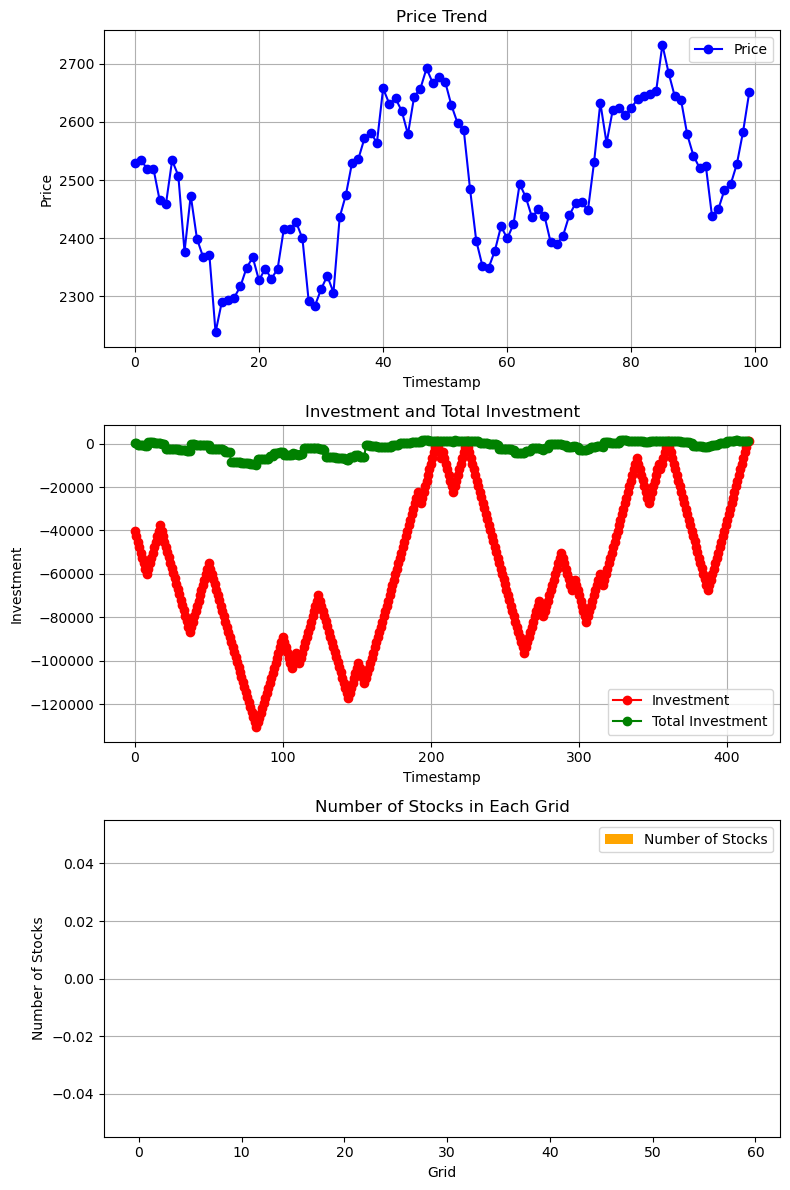

In [ ]:
# 网格交易 部分
from grid_calculator import GridCalculator
import random

def generate_prices(length, min_value, max_value):
    """
    生成一个随机数列表，每个数字有一位小数，相邻两个数不同。

    :param length: 随机数列表的长度
    :param min_value: 随机数的最小值（含）
    :param max_value: 随机数的最大值（含）
    :return: 满足条件的随机数列表
    """
    if min_value >= max_value:
        raise ValueError("min_value must be less than max_value")

    prices = []
    prev_price = None

    while len(prices) < length:
        # 生成一个具有一位小数的随机数
        price = round(random.uniform(min_value, max_value), 1)
        
        # 确保当前价格与前一个价格不同
        if price != prev_price:
            prices.append(price)
            prev_price = price

    return prices

# seed = 66
# random.seed(seed)
# prices = generate_prices(length=100, min_value=8, max_value=12)
# prices = [10] + prices + [11]

prices = grid_trading
print("prices:", prices)
config = {
    "lower_bound": 2200,
    "upper_bound": 2650,
    "num_grids": 60,
    "leverage": 1,
    "investment": 3000,
    "mode": "geometric"
}
grid_calc = GridCalculator(config, prices)
grid_calc.generate_grid()

print("开始交易")
grid_calc.run()

grid_calc.conclusion()

In [ ]:
# Validate configuration
config.validate()

# Initialize components
market_data = MarketData(config)
grid_calc = GridCalculator(config)
risk_metrics = RiskMetrics(config)
visualizer = GridVisualizer(config)

# Generate or fetch market data
prices, timestamps = market_data.generate_simulated_data()

# Process price updates
trades = []
equity_curve = [config.initial_capital]

for i, (price, timestamp) in enumerate(zip(prices, timestamps)):
    realized_pnl, unrealized_pnl = grid_calc.process_price_update(price, timestamp)
    current_equity = config.initial_capital + realized_pnl + unrealized_pnl
    equity_curve.append(current_equity)
    risk_metrics.update_equity_curve(current_equity)
    
    if grid_calc.trades:
        trades.append((timestamp, price, grid_calc.trades[-1].side))

# Calculate risk metrics
max_drawdown = risk_metrics.calculate_max_drawdown()
sharpe_ratio = risk_metrics.calculate_sharpe_ratio()

# Print results
print(f"\nTrading Results:")
print(f"Initial Capital: ${config.initial_capital:,.2f}")
print(f"Final Equity: ${equity_curve[-1]:,.2f}")
print(f"Total Return: {((equity_curve[-1]/config.initial_capital - 1) * 100):,.2f}%")
print(f"Maximum Drawdown: {max_drawdown*100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

# Visualize results
visualizer.plot_trading_view(prices, timestamps, trades)
visualizer.plot_equity_curve(equity_curve, timestamps)



In [3]:
import matplotlib.pyplot as plt
import numpy as np


def grid_trading_strategy(config, price_data):
    """
    执行网格交易策略回测
    :param config: 策略配置字典，包含价格区间、网格数量、杠杆、初始投资等信息
    :param price_data: 历史价格数据列表
    :return: 持仓量列表、资金列表、收益率列表、价格列表
    """
    lower_bound = config["lower_bound"]
    upper_bound = config["upper_bound"]
    num_grids = config["num_grids"]
    leverage = config["leverage"]
    investment = config["investment"]
    mode = config["mode"]

    grid_width = (upper_bound - lower_bound) / num_grids
    grid_prices = []
    if mode == "arithmetic":
        grid_prices = [lower_bound + i * grid_width for i in range(num_grids + 1)]
    # 每个网格分配的资金（初始投资平均分配到各个网格）
    grid_investment = investment / num_grids
    # 每个网格对应的标的数量（这里简单按资金/价格算，实际更复杂，需考虑交易成本等）
    grid_quantity = [grid_investment / price for price in grid_prices[:-1]]
    position_quantity = 0  # 当前持仓量
    cash = investment  # 当前现金
    positions = []  # 记录持仓均价等信息
    cash_history = [cash]
    position_history = [position_quantity]
    returns_history = []
    price_history = []
    # 计算爆仓价（简单示例，实际更复杂，需考虑保证金率等更多因素）
    margin_call_price = (investment / leverage) / (investment / price_data[0]) if leverage > 1 else 0

    for price in price_data:
        price_history.append(price)
        # 判断当前价格处于哪个网格区间
        grid_index = None
        for i in range(len(grid_prices) - 1):
            if grid_prices[i] <= price < grid_prices[i + 1]:
                grid_index = i
                break
        if grid_index is None:
            continue
        # 如果价格上涨到下一个网格，卖出
        if grid_index < len(grid_prices) - 2 and price >= grid_prices[grid_index + 1]:
            sell_quantity = grid_quantity[grid_index]
            cash += sell_quantity * price
            position_quantity -= sell_quantity
            # 在低价格处挂买单（这里简化处理，只更新相关数据）
            grid_quantity[grid_index] = grid_investment / grid_prices[grid_index]
        # 如果价格下跌到当前网格，买入
        elif grid_index > 0 and price < grid_prices[grid_index]:
            buy_quantity = grid_quantity[grid_index - 1]
            cash -= buy_quantity * price
            position_quantity += buy_quantity
            # 在高价格处挂卖单（这里简化处理，只更新相关数据）
            grid_quantity[grid_index - 1] = grid_investment / grid_prices[grid_index - 1]
        positions.append((price, position_quantity, cash))
        cash_history.append(cash)
        position_history.append(position_quantity)
        # 简单计算收益率（未考虑复杂成本等）
        returns = (cash + position_quantity * price - investment) / investment
        returns_history.append(returns)

        if leverage > 1 and price < margin_call_price:
            print("爆仓了！")
            break

    return position_history, cash_history, returns_history, price_history

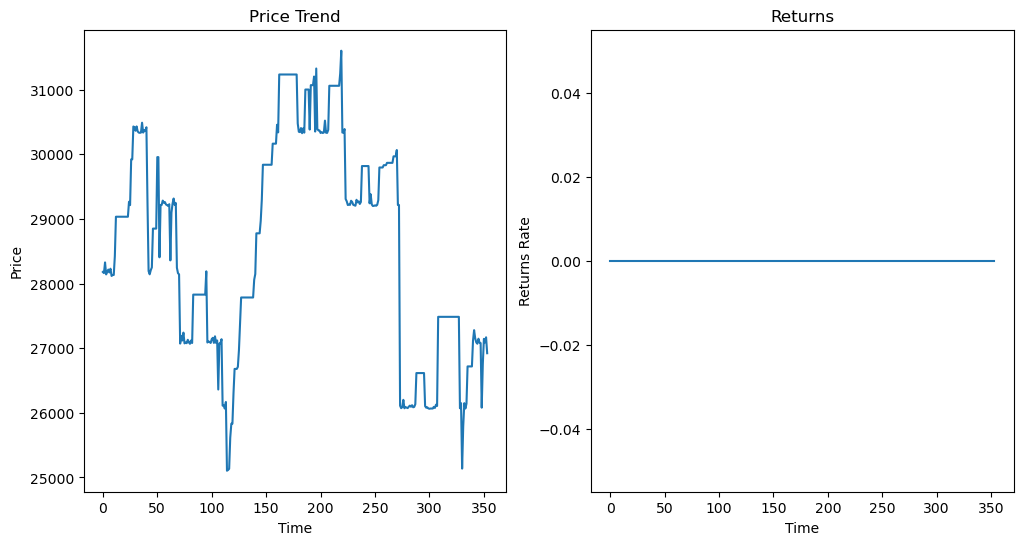

In [7]:
# 模拟的历史价格数据（这里简单示例，你需要替换成真实数据）
price_data = grid_trading
config = {
    "lower_bound": 25000,
    "upper_bound": 38000,
    "num_grids": 10,
    "leverage": 1,
    "investment": 500000,
    "mode": "arithmetic"
}
position_history, cash_history, returns_history, price_history = grid_trading_strategy(config, price_data)

# 绘制价格走势和收益率曲线
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(price_history)
plt.title("Price Trend")
plt.xlabel("Time")
plt.ylabel("Price")

plt.subplot(1, 2, 2)
plt.plot(returns_history)
plt.title("Returns")
plt.xlabel("Time")
plt.ylabel("Returns Rate")

plt.show()